# Sistemas Dinámicos en la Fisiología
## Tlacaelel Jaime Flores Villaseñor

#### Graficación de Plano Fase con ceróclinas con cálculo de valores propios y clasificación automática del sistema

In [64]:
import numpy as np
import matplotlib.pylab as plt
import cmath

def f(U): #definicion de la funcion
    x,y = U
    dx = pars['a']*x + pars['b']*y
    dy = pars['c']*x + pars['d']*y
    return np.array([dx,dy])

def RK4vec(ic,f,d): #MEtdo Runge.Kutta de orden 4 con el diccionario
    t = np.arange(d['tinit'],d['tfinal'],d['h'])
    U = np.zeros((len(t),len(ic))) # vector con la solucion
    U[0] = ic # condicion inicial
    for i in range(1,len(t)): #implementacion del metodo
        k1 = f(U[i-1])*d['h']
        k2 = f(U[i-1]+k1/2)*d['h']
        k3 = f(U[i-1]+k2/2)*d['h']
        k4 = f(U[i-1]+k3)*d['h']
        U[i] = U[i-1]+(k1+2*k2+2*k3+k4)/6
    return U.transpose()

def eigenval(a,b,c,d):#obtencion de valores propios
    p=a+d
    q=a*d - c*b
    Delta=p**2-4*q
    
    det=0
    if Delta <0:
        det=cmath.sqrt(Delta)
    else:
        det=np.sqrt(Delta)
    l1 = 0.5*(p+det)
    l2 = 0.5*(p-det)
    return l1,l2,p,q,Delta

def graf(maxi,solm,pars): #valores maximos para el meshgrid, numero de soluciones,diccionario
    x = np.arange(-maxi,maxi)
    y = np.arange(-maxi,maxi)
    X,Y = plt.meshgrid(x,y)
    U = pars['a']*X + pars['b']*Y #funciones del sistema
    V = pars['c']*X + pars['d']*Y
    
    if pars['b'] == 0:
        yn=np.zeros(2*maxi)
        xn=-pars['c']*x/pars['d'] #ceroclinas
    elif pars['d'] == 0:
        xn=np.zeros(2*maxi)
        yn=-pars['a']*x/pars['b']
    else:
        xn=-pars['c']*x/pars['d'] #ceroclinas
        yn=-pars['a']*x/pars['b']
   
    plt.figure(dpi=100)
    for i in np.arange(1,solm,0.5):
        xi,yi = RK4vec([i,i],f,pars) #plano fase
        plt.plot(xi,yi,'g')
    plt.quiver(X,Y,U,V)
    plt.plot(yn,y,'b--',label='Ceroclinas')
    plt.plot(x,xn,'b--')
    plt.xlim([-maxi,maxi])
    plt.ylim([-maxi,maxi])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plano Fase')
    plt.legend()
    plt.show()
    return

def clas(p,q,Delta):
    if p == 0:#Clasifcacion de sistemas 
        if q>0:
            print 'El sistema es un centro.'
        elif q<0:
            print 'El sistema es un saddle node.'
        else:
            print 'El sistema es una serie de puntos en el eje x.'
    elif p<0:
        if q >0:
            if Delta < 0:
                print 'El sistema es una espiral estable.'
            elif Delta >0:
                print 'El sistema es un nodo estable.'
            else:
                print 'El sistema es un nodo degenerado estable'
        elif q<0:
            print 'El sistema es un Saddle Node'
        else:
            print 'El sistema es una serie de puntos estables en el eje x.'
    else:
        if q>0:
            if Delta <0:
                print 'El sistema es una espiral inestable.'
            elif Delta >0:
                print 'El sistema es un nodo inestable.'
            else:
                print 'El sistema es un nodo degenerado inestable.'
        elif q<0:
            print 'El sistema es un Saddle Node'
        else:
            print 'El sistema es una serie de puntos estables en el eje x.'
    return

#### $2.\ \dot{x} = 5x+2y$; $\dot{y}=-17x-5y$

La matriz del sistema es: [[  5   2]
 [-17  -5]]


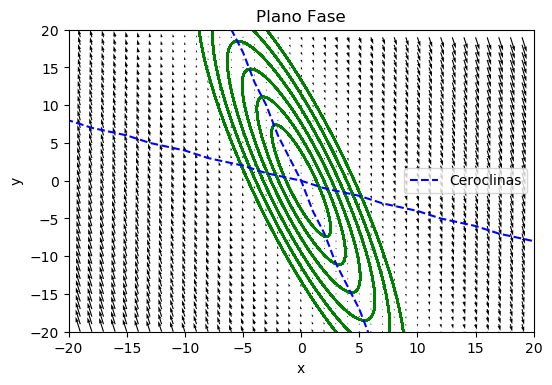

Los valores propios son: 3j , -3j
El sistema es un centro.


In [58]:
pars = {'a':5, 'b':2, 'c':-17, 'd':-5, 'tinit':0, 'tfinal':100, 'h':0.01} #Diccionario

A = np.array([[pars['a'],pars['b']],[pars['c'],pars['d']]]) #matriz del sistema
print "La matriz del sistema es: "+str(A)

l1,l2,p,q,Delta=eigenval(pars['a'],pars['b'],pars['c'],pars['d']) #eigenvalores del sistema

graf(20,4,pars) #grafica del plano fase

print "Los valores propios son:", l1,',',l2

clas(p,q,Delta)

$4.\ \dot{x} = -2y$; $\dot{y}=x$

La matriz del sistema es: [[ 0 -2]
 [ 1  0]]


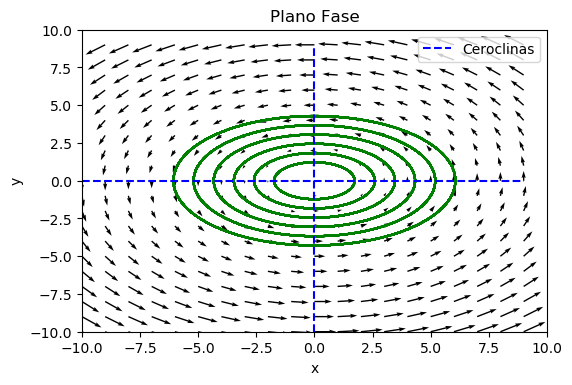

Los valores propios son: 1.41421356237j , -1.41421356237j
El sistema es un centro.


In [65]:
pars = {'a':0, 'b':-2, 'c':1, 'd':0, 'tinit':0, 'tfinal':100, 'h':0.01} #Diccionario, los coeficientes a,b,c,d 
                                                                          #correspnden a los coeficientes del sistema
A = np.array([[pars['a'],pars['b']],[pars['c'],pars['d']]]) #matriz del sistema
print "La matriz del sistema es: "+str(A)

l1,l2,p,q,Delta=eigenval(pars['a'],pars['b'],pars['c'],pars['d']) #eigenvalores del sistema

graf(10,4,pars) #grafica del plano fase

print "Los valores propios son:", l1,',',l2

clas(p,q,Delta)

$6.\ \dot{x} = x-y$; $\dot{y}=x+y$

La matriz del sistema es: [[ 1 -1]
 [ 1  1]]


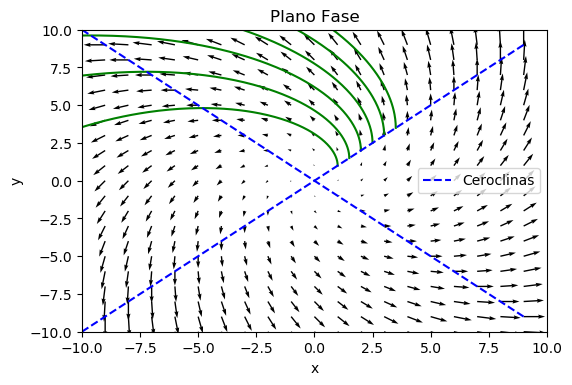

Los valores propios son: (1+1j) , (1-1j)
El sistema es una espiral inestable.


In [66]:
pars = {'a':1, 'b':-1, 'c':1, 'd':1, 'tinit':0, 'tfinal':100, 'h':0.01} #Diccionario, los coeficientes a,b,c,d 
                                                                          #correspnden a los coeficientes del sistema
A = np.array([[pars['a'],pars['b']],[pars['c'],pars['d']]]) #matriz del sistema
print "La matriz del sistema es: "+str(A)

l1,l2,p,q,Delta=eigenval(pars['a'],pars['b'],pars['c'],pars['d']) #eigenvalores del sistema

graf(10,4,pars) #grafica del plano fase

print "Los valores propios son:", l1,',',l2

clas(p,q,Delta)